# Milestones 2

`Ridhwan Muttaqien - HCK06`

## URL Deployment

https://huggingface.co/spaces/Ridhwanm/h8dsft_P1M2_Ridhwan_Muttaqien

## Description & Objective

```
Dataset yang kita analisa adalah data customer sebuah perusahaan telekomunikasi di California pada Q2 2022 (April - Juni 2022). Dataset berisi data demografi customer, layanan yang digunakan, status customer di akhir Q2, dan pemasukan yang diterima perusahaan per customer.

Milestones 2 ini dibuat untuk menganalisa masalah churn pada customer dan untuk membuat permodelan deteksi churn pada seorang customer. Hasil deteksi permodelan diharapkan dapat membantu perusahaan untuk mencegah seorang customer churn sebelum hal itu terjadi dengan melakukan pendekatan intensif pada customer yang terdeteksi churn.

Untuk memudahkan perusahaan menggunakan permodelan yang sudah dibuat maka Milestones 2 ini juga menyertakan link aplikasi sederhana untuk melakukan prediksi dengan menginput beberapa data tentang customer.
```

## Libraries Importing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import joblib
import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')
pd.set_option("display.max.columns", None)
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,7,Offer E,Yes,10.53,No,Yes,DSL,21.0,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,65,None,Yes,28.46,Yes,Yes,Cable,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


### Overview Missing Value & Duplicated Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

`Sekilas terlihat beberapa kolom memiliki missing value, kita perlu mengecek lebih lanjut jumlah dan alasan kenapa bisa ada missing value tersebut di langkah selanjutnya`

In [4]:
# menghitung jumlah missing value di semua kolom

df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

`Terlihat missing value pada dataset kita memiliki pola tertentu, indikasi ini terlihat dari jumlah missing value yang sama di beberapa kolom. Untuk lebih jelas kita bisa mengacu pada dataset keterangan kolom apakah sebab missing value bisa dijelaskan`

In [5]:
# menampilkan dataframe keterangan tiap kolom

df2 = pd.read_csv('telecom_data_dictionary.csv',encoding='cp1252')
pd.set_option('display.max_colwidth', None)
df2

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customer’s gender: Male, Female"
2,Customer Churn,Age,"The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022)"
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,"Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)"
5,Customer Churn,City,The city of the customer’s primary residence in California
6,Customer Churn,Zip Code,The zip code of the customer’s primary residence
7,Customer Churn,Latitude,The latitude of the customer’s primary residence
8,Customer Churn,Longitude,The longitude of the customer’s primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has referred a friend or family member to this company to date


```
- Jika kita melihat kolom Internet Type, ada keterangan dimana jika customer tidak berlangganan Internet Service (kolom Internet Service berisi 'No'), maka kolom yang berkaitan dengan internet akan dikosongkan. Maka missing value ini hanya ada pada customer yang tidak berlangganan internet

- Akan kita buktikan dengan menampilkan customer yang tidak berlangganan internet (kolom Internet Service berisi 'No') dan membandingkan jumlah barisnya dengan jumlah missing value

- Jika kita melihat kolom Avg Monthly Long Distance Charges dan Multiple Lines, ada keterangan dimana jika customer tidak berlangganan home phone service (kolom Phone Service berisi 'No'), maka kedua kolom tersebut akan dikosongkan. Maka missing value ini hanya ada pada customer yang tidak berlangganan home phone

- Akan kita buktikan dengan menampilkan customer yang tidak berlangganan home phone (kolom Phone Service berisi 'No') dan membandingkan jumlah barisnya dengan jumlah missing value

- Kolom Churn Category dan Churn Reason hanya terisi pada customer yang Customer Status nya adalah Churned sedangkan selain itu tidak diisi atau missing value. Kita bisa membandingkan jumlah customer yang tidak churn dengan missing value pada kedua kolom tersebut.
```

In [6]:
# menampilkan jumlah customer yang tidak berlangganan internet

df['Internet Service'].value_counts()

Yes    5517
No     1526
Name: Internet Service, dtype: int64

`Terlihat jumlah 'No' sama dengan jumlah missing value pada kolom yang berkaitan dengan internet yaitu 1526`

In [7]:
# menampilkan jumlah customer yang tidak berlangganan home phone

df['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

`Terlihat jumlah 'No' sama dengan jumlah missing value pada kolom Avg Monthly Long Distance Charges dan Multiple Lines yaitu 628`

In [8]:
# menampilkan jumlah customer yang churn

df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

`Terlihat jumlah 'Stayed' dan 'Joined' jika dijumlahkan sama dengan jumlah missing value pada kolom Churn Category dan Churn Reason yaitu 5174`

In [9]:
df.duplicated().sum()

0

`Tidak terdapat data terduplikasi pada dataset`

### Overview Unique Value

In [10]:
for i in df:
    print(i)
    print(df[i].nunique())
    print('-'*30)

Customer ID
7043
------------------------------
Gender
2
------------------------------
Age
62
------------------------------
Married
2
------------------------------
Number of Dependents
10
------------------------------
City
1106
------------------------------
Zip Code
1626
------------------------------
Latitude
1626
------------------------------
Longitude
1625
------------------------------
Number of Referrals
12
------------------------------
Tenure in Months
72
------------------------------
Offer
6
------------------------------
Phone Service
2
------------------------------
Avg Monthly Long Distance Charges
3583
------------------------------
Multiple Lines
2
------------------------------
Internet Service
2
------------------------------
Internet Type
3
------------------------------
Avg Monthly GB Download
49
------------------------------
Online Security
2
------------------------------
Online Backup
2
------------------------------
Device Protection Plan
2
----------------

In [11]:
# melakukan looping pada kolom Customer Status untuk menggabungkan value Joined dengan Stayed

status = []

for stt in df['Customer Status']:
    if stt in ['Stayed','Joined']:
        status.append('Stayed')
    else:
        status.append(stt)

df['Customer Status'] = status

`Kolom Category Status terdiri dari 3 value unik yaitu Stayed, Churned, dan Joined. Value Joined bisa kita gabungkan dengan Stayed karena masih bisa mencakup makna status yang sama, selain itu jumlah value Joined juga sangat sedikit jika dibandingkan dengan Stayed dan Churned`

In [12]:
# melakukan drop terhadap kolom yang tidak digunakan berdasarkan

df1 = df.drop(['Customer ID','City','Zip Code','Latitude','Longitude','Churn Category','Churn Reason'],axis=1)
df1

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,Male,22,No,0,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Stayed
7041,Male,21,Yes,0,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


```
- Kolom Customer ID berisi kode unik setiap customer maka akan didrop karena secara logika tidak akan mempengaruhi terjadinya churn

- Kolom City, Zip Code, Longitude, dan Latitude adalah kolom yang menjelaskan lokasi customer kita berada. Secara logika tidak ada pengaruh antara lokasi dengan terjadi churn atau bisa dikatakan seorang customer tidak akan menjadi churn hanya karena dia berlokasi di suatu kota tertentu. Jika terjadi jumlah churn yang tinggi di suatu kota maka itu bukan disebabkan oleh lokasi kota tersebut tetapi oleh hal lain yang harus diteliti lebih lanjut.

- Kolom Churn Category dan Churn Reason adalah kolom yang berisi alasan seseorang berhenti berlangganan maka ini juga bukan kolom yang bisa menjadi feature permodelan kita. Tapi dari kolom ini kita bisa analisis lebih jauh alasan customer menjadi churn dan mencari solusi untuk mencegah hal tersebut
```

## Exploratory Data Analysis (EDA)

### 1. Kota mana yang paling banyak terjadi churned ? 

In [13]:
# membuat dataframe untuk customer yang berstatus churned

df_churn = df[df['Customer Status']=='Churned']

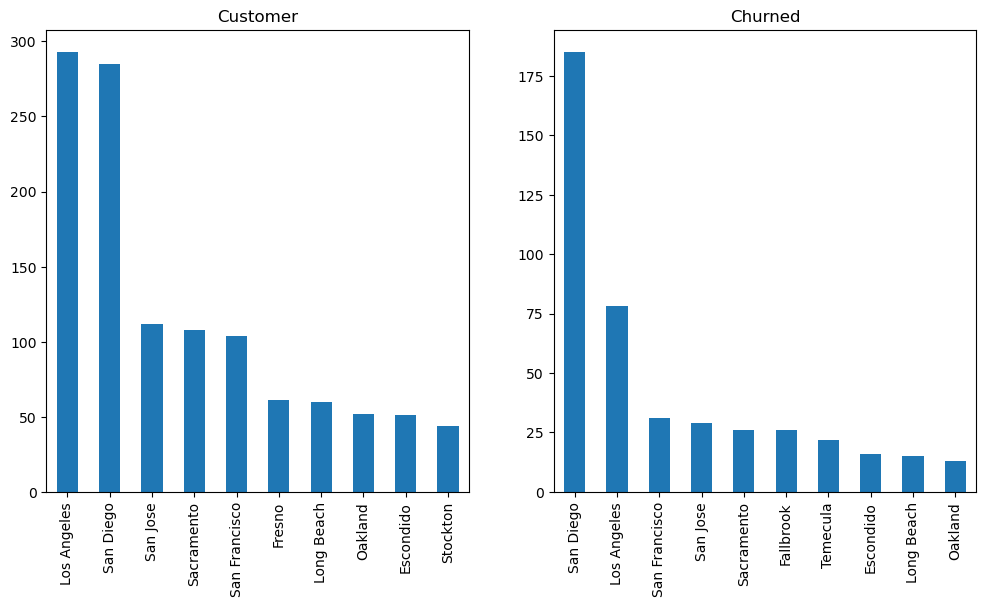

In [14]:
# menampilkan visualisasi jumlah customer per kota dan jumlah churn per kota

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

df['City'].value_counts().head(10).plot(kind='bar', ax=ax[0])
df_churn['City'].value_counts().head(10).plot(kind='bar', ax=ax[1])

ax[0].set_title('Customer')
ax[1].set_title('Churned')

plt.show()

`Terlihat dari grafik di atas, San Diego menjadi kota dengan jumlah churned yang paling besar padahal dia adalah kota dengan jumlah customer terbanyak ke-2. Dari jumlah customer 285, yang bestatus churned adalah 185`

### 2. Apa saja alasan customer di San Diego berhenti berlangganan?

In [15]:
# membuat dataframe berisi cutomer churn di kota San Diego

df_churn_SD = df_churn[df_churn['City']=='San Diego']

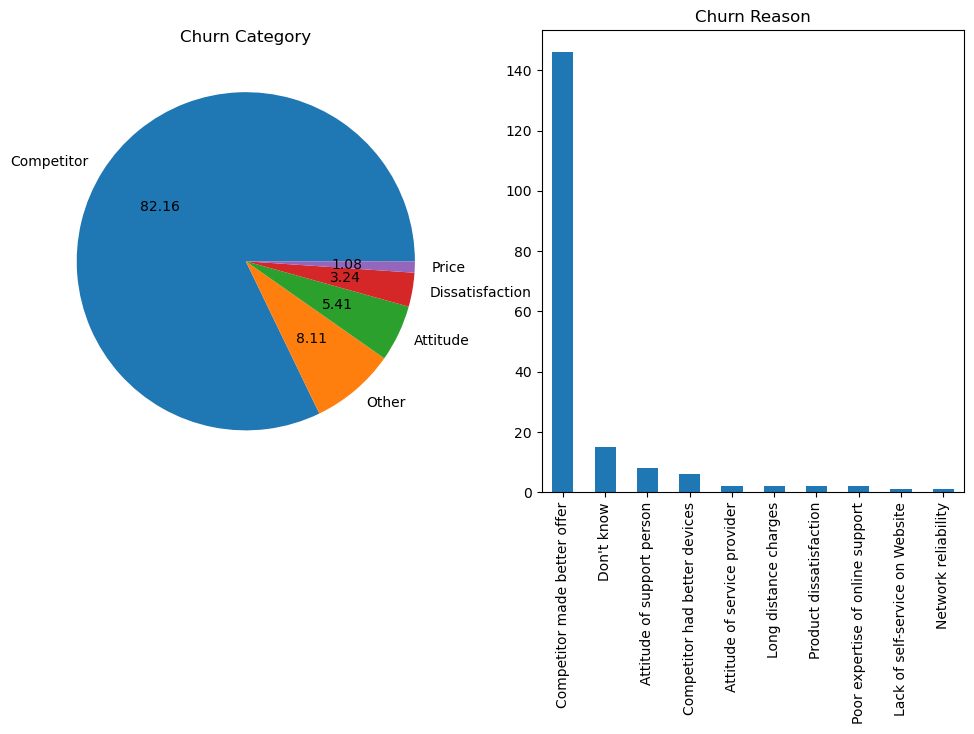

In [16]:
# menampilkan visualisasi kategori dan alasan churn dari customer di kota San Diego

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

df_churn_SD['Churn Category'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0])
df_churn_SD['Churn Reason'].value_counts().plot(kind='bar', ax=ax[1])

ax[0].set_title('Churn Category')
ax[0].set_ylabel(None) 
ax[1].set_title('Churn Reason')

plt.show()

`Tindak lanjut dari temuan masalah di nomor 1, maka kita analisa alasan apa saja yang membuat customer San Diego churn. Terlihat dari hasil visualisasi, Jumlah customer churn di San Diego disebabkan oleh pihak kompetitor yang memberikan tawaran yang lebih baik daripada perusahaan kita`

### 3. Bagaimana kondisi penawaran marketing perusahaan kita terhadap customer di San Diego yang berstatus churned?

In [17]:
# menghitung jumlah customer churn San Diego berdasarkan jenis kontrak langganan

df_churn_SD.Contract.value_counts()

Month-to-Month    164
One Year           17
Two Year            4
Name: Contract, dtype: int64

In [18]:
# menghitung jumlah customer churn San Diego berdasarkan tawaran paket langganan yang digunakan

df_churn_SD.Offer.value_counts()

None       114
Offer E     36
Offer C     15
Offer D     10
Offer A      6
Offer B      4
Name: Offer, dtype: int64

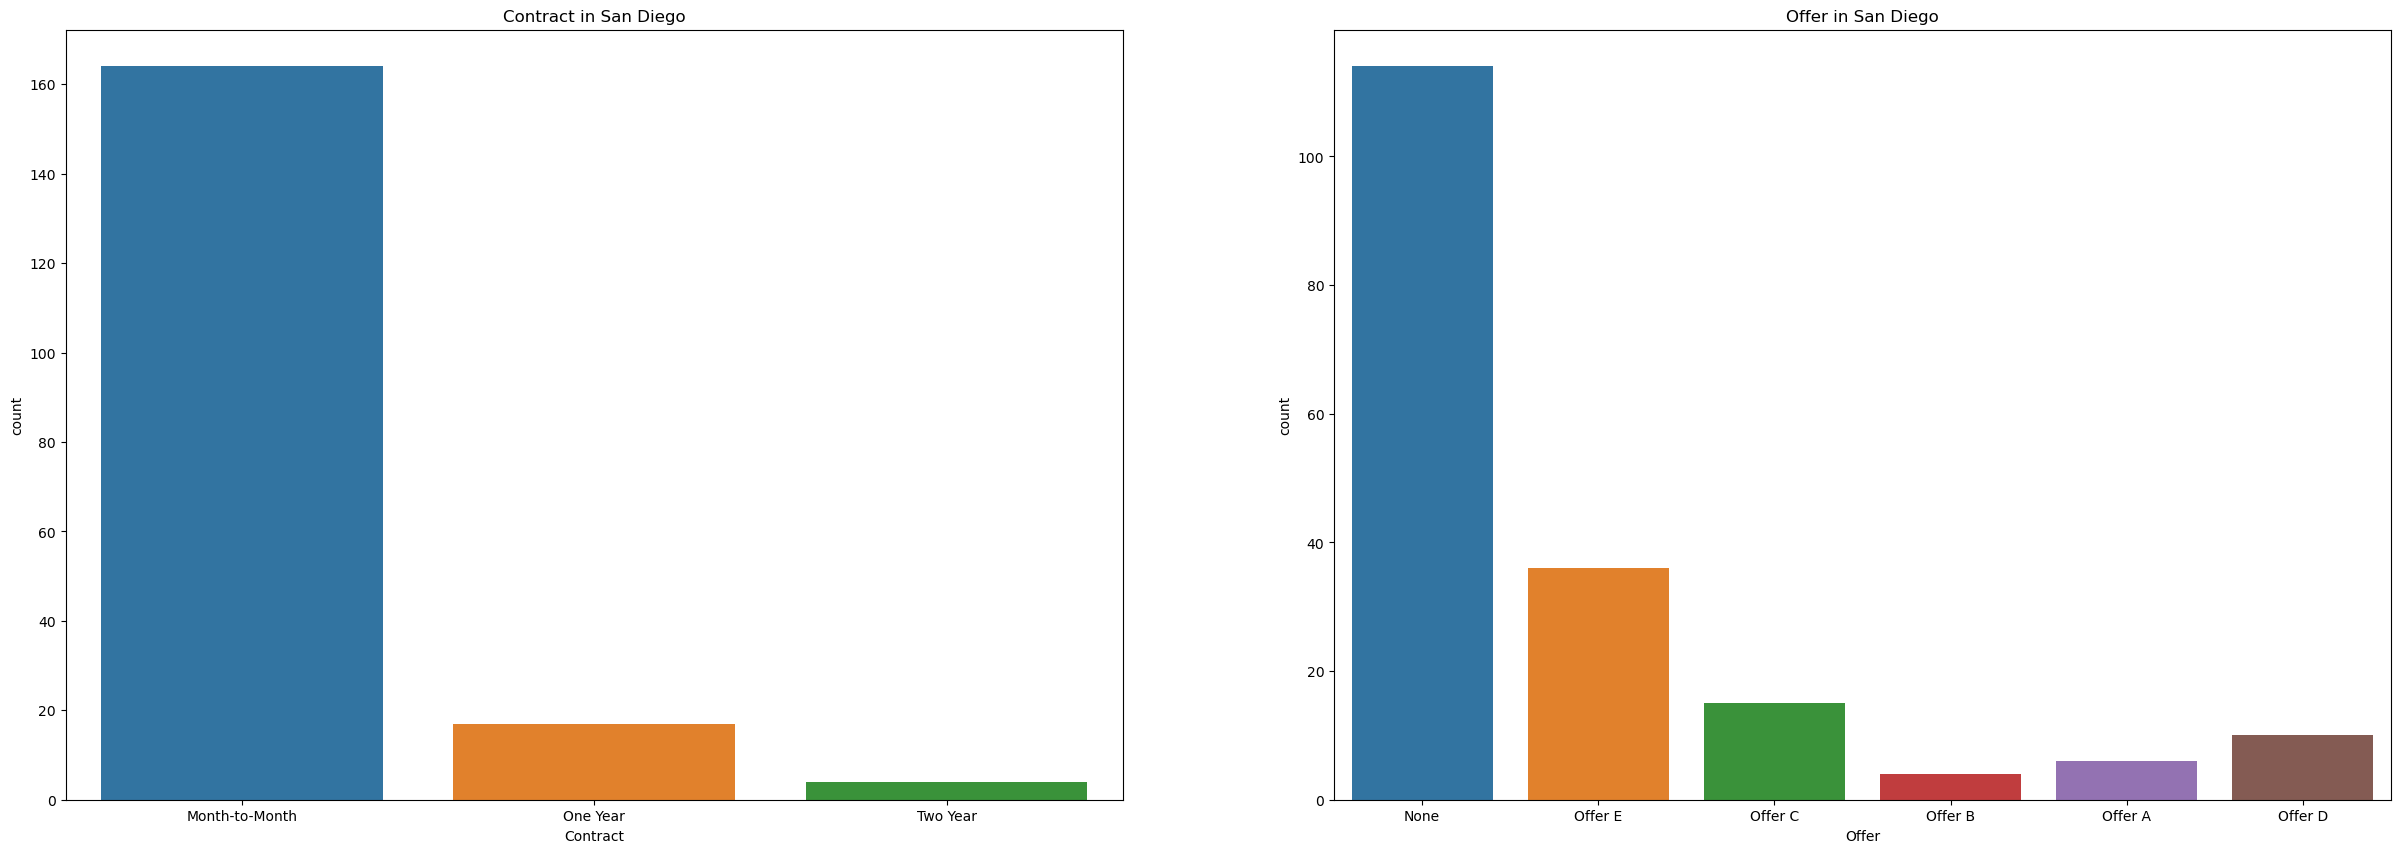

In [19]:
# menampilkan visualisasi jumlah customer churn San Diego berdasarkan kontrak langganan dan tawaran paket yang digunakan

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))

sns.countplot(x=df_churn_SD['Contract'], ax=ax[0])
sns.countplot(x=df_churn_SD['Offer'], ax=ax[1])

ax[0].set_title('Contract in San Diego')
ax[1].set_title('Offer in San Diego')

plt.show()

```
Berdasarkan analisa terhadap alasan customer churn didapatkan alasan utamanya adalah pihak kompetitor memberikan tawaran yang lebih baik. Maka kita tinjau jenis subscription customer berdasarkan waktu dan paket yang ditawarkan kepada mereka.

Terlihat dari hasil visualisasi di atas, mayoritas customer churn di San Diego berlangganan bulanan dan tidak menerima tawaran apapun yang diajukan oleh marketing perusahaan kita. Tipe-tipa tawaran yang diajukan tidak mendapatkan respon yang baik sehingga customer memilih untuk berlangganan bulanan tanpa paket tawaran apapun. Ini bisa menjadi catatan bagi tim marketing untuk meramu ulang tawaran yang lebih menarik untuk customer sehingga tidak mudah berpindah karena tawaran pihak kompetitor. 
```

### 4. Secara umum, apa saja alasan customer berhenti berlangganan?

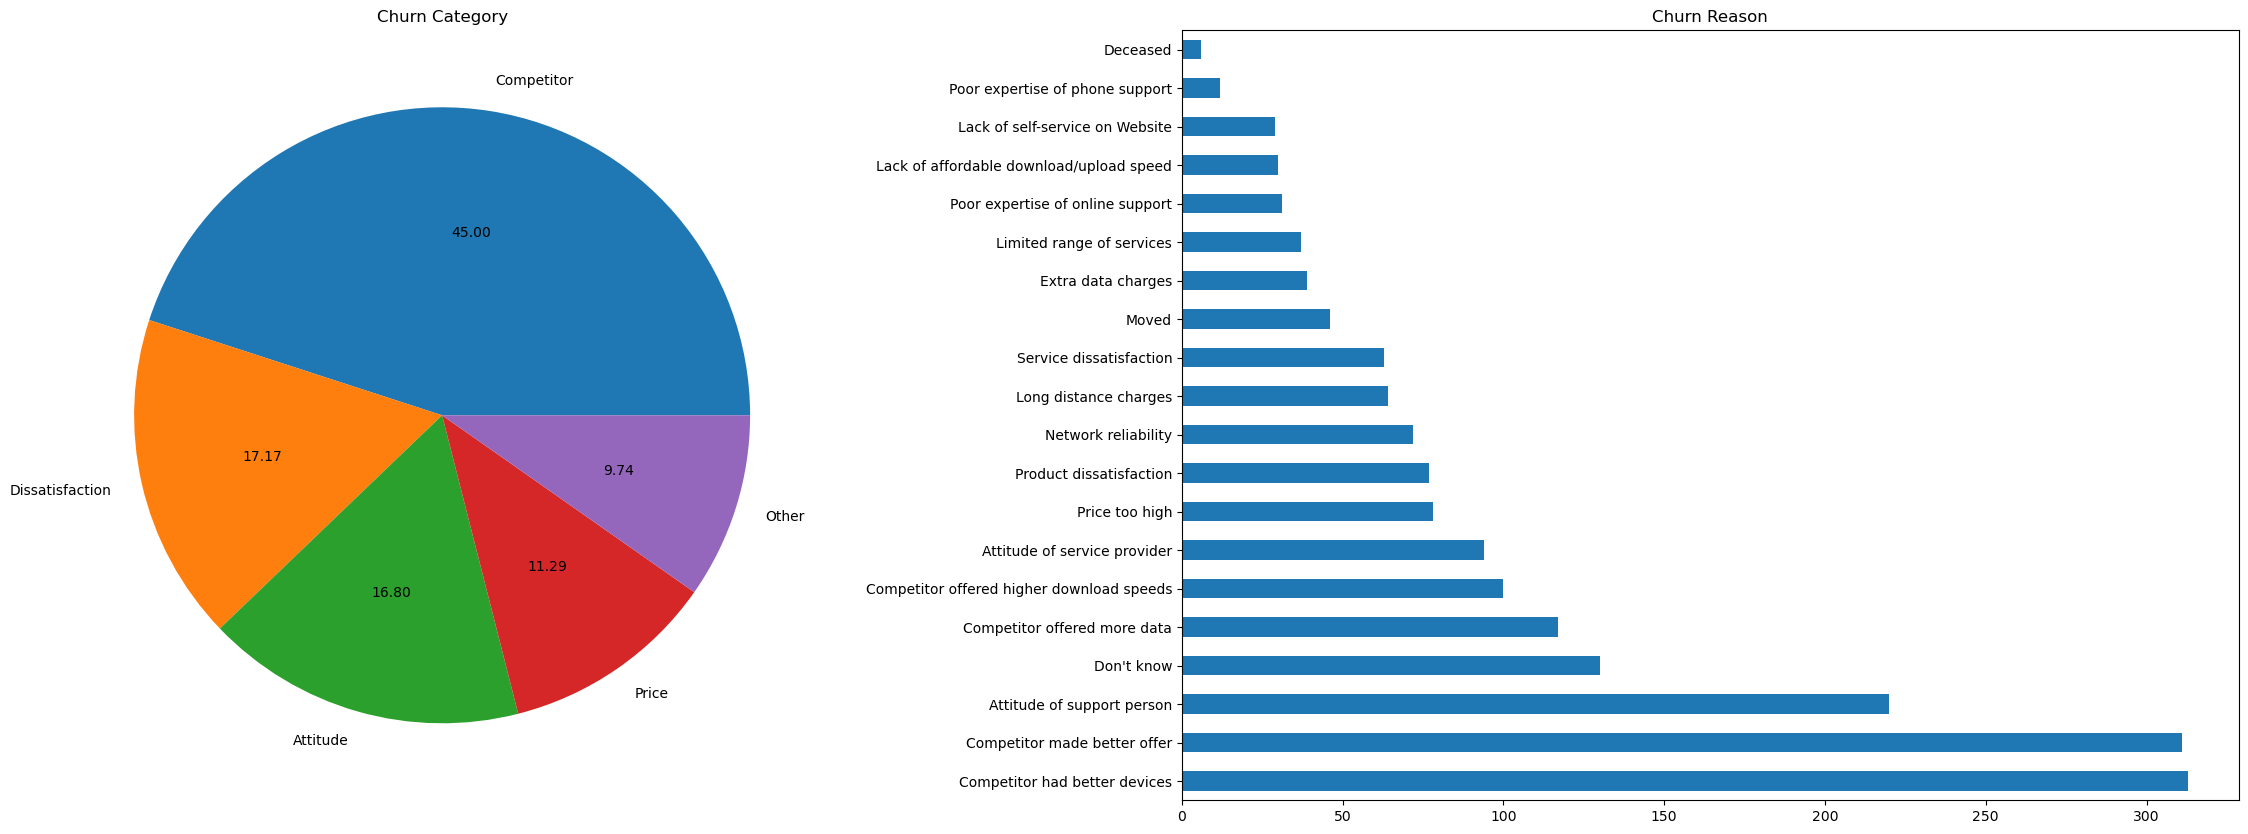

In [20]:
# menampilkan visualisasi kategori dan alasan customer churn secara umum

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))

df['Churn Category'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0])
df['Churn Reason'].value_counts().plot(kind='barh', ax=ax[1])

ax[0].set_title('Churn Category')
ax[0].set_ylabel(None) 
ax[1].set_title('Churn Reason')

plt.show()

`Customer churn bisa dibagi menjadi beberapa kategori. 3 kategori teratas adalah masalah kompetitor, ketidakpuasan, dan sikap buruk personil. Jika dijabarkan lebih detil kita mendapati bahwa salah satu alasan churn adalah customer merasa peralatan yang dimiliki pihak kompetitor lebih baik dari peralatan kita. Ini bisa menjadi catatan untuk dianalisa lebih lanjut`

### 5. Apakah kondisi peralatan yang dimiliki perusahaan termasuk alasan customer berhenti berlangganan? Jika ya, peralatan apa yang harus menjadi fokus?

In [21]:
# menghitung jumlah customer churn dengan alasan peralatan kompetitor lebih baik

df_churn_dvc = df[df['Churn Reason']=='Competitor had better devices']
df_churn_dvc['Internet Type'].value_counts()

Fiber Optic    219
DSL             52
Cable           42
Name: Internet Type, dtype: int64

<Axes: xlabel='Internet Type', ylabel='count'>

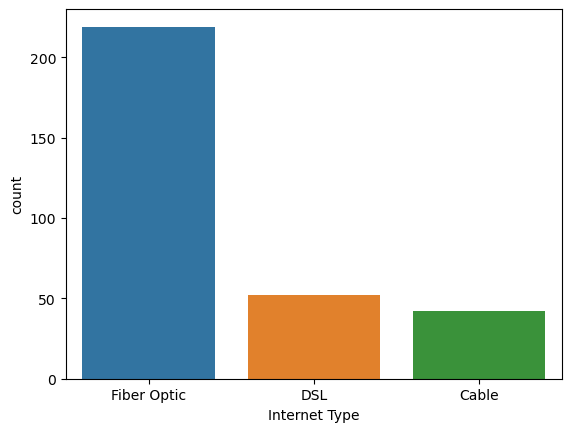

In [22]:
# menampilkan visualisasi jenis jaringan yang dipakai oleh customer churn

sns.countplot(x=df_churn_dvc['Internet Type'])

```
Kita akan mengelaborasi hasil temuan di nomor 4 dengan menganalisa peralatan yang kita miliki. Tenyata mayoritas customer yang merasa pihak kompetitor memiliki peralatan yang lebih baik adalah customer yang dilayani dengan jaringan fiber optic.

Ada 2 kemungkinan dari hal ini, apakah fiber optic yang kita gunakan kualitasnya di bawah kualitas fiber optic yang digunakan kompetitor atau sering terjadi gangguan pada jaringan fiber optic yang kita miliki. Ini bisa menjadi catatan untuk tim maintenance jika terkait gangguan jaringan.
```

## Features Selection

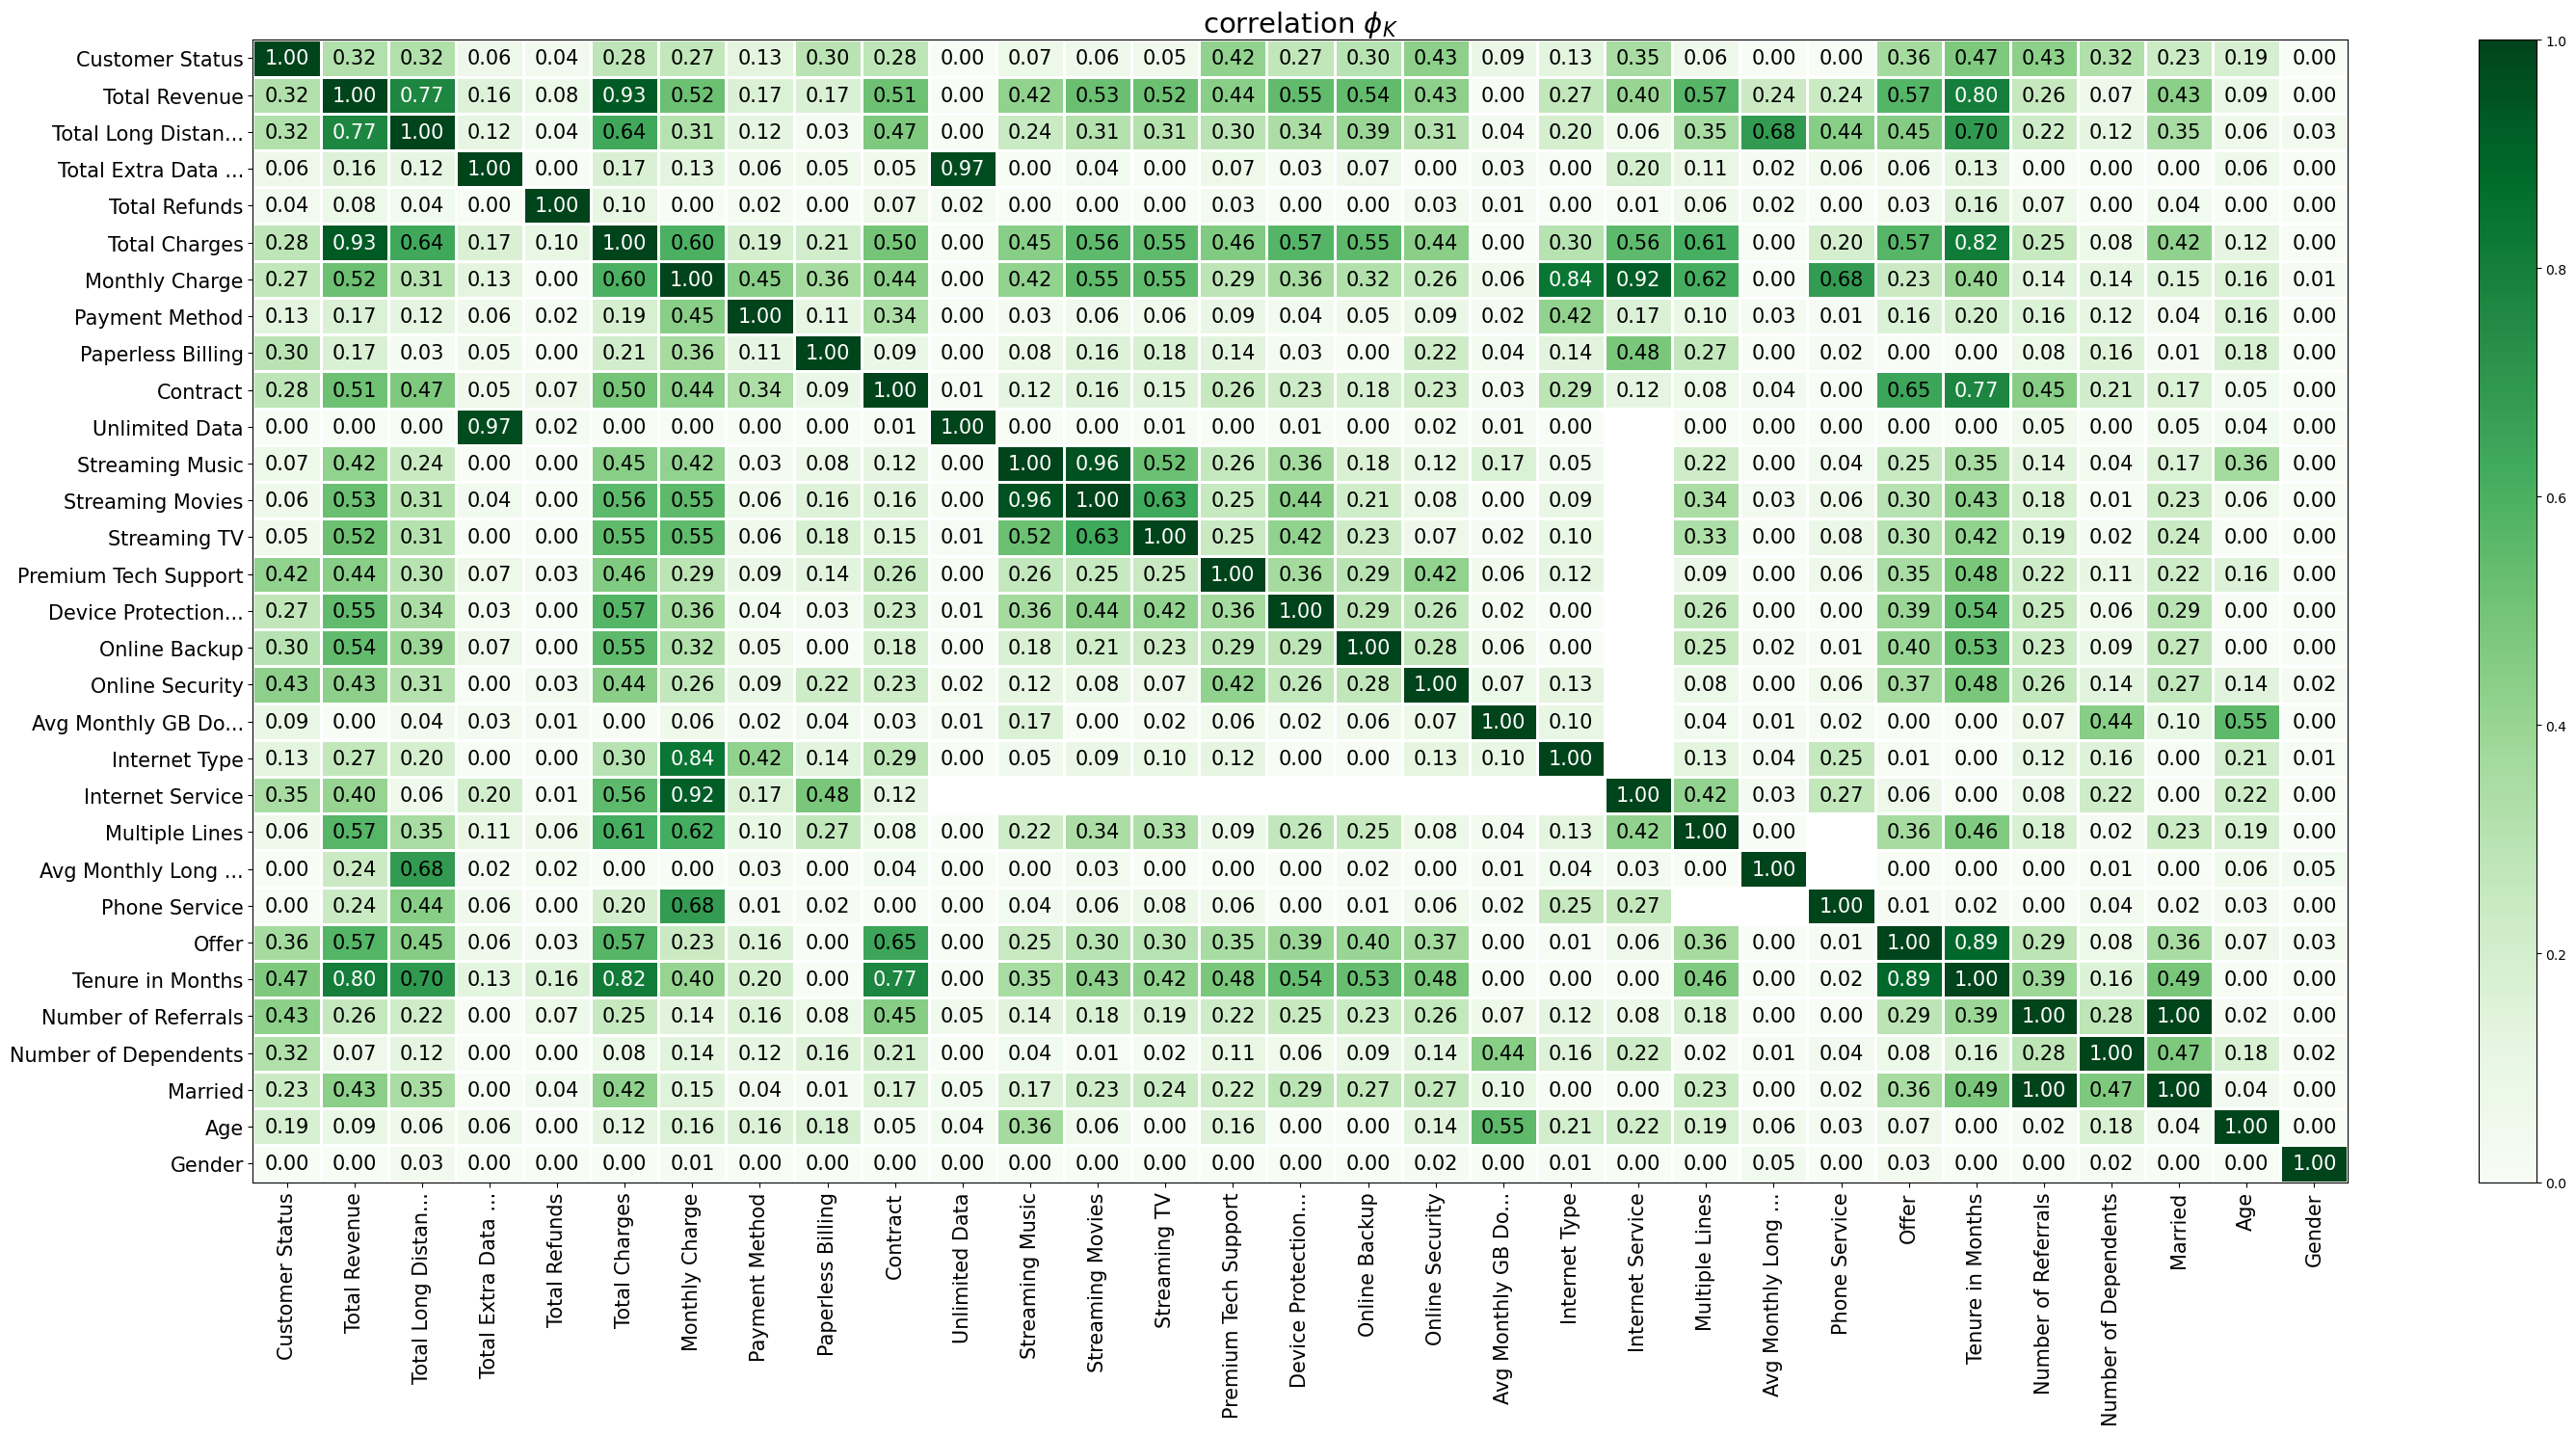

In [23]:
# menampilkan korelasi antar kolom pada dataframe dengan heatmap
import phik
from phik.report import plot_correlation_matrix
interval_cols = ['Age', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']
phik_overview = df1.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(30, 15))
plt.tight_layout()

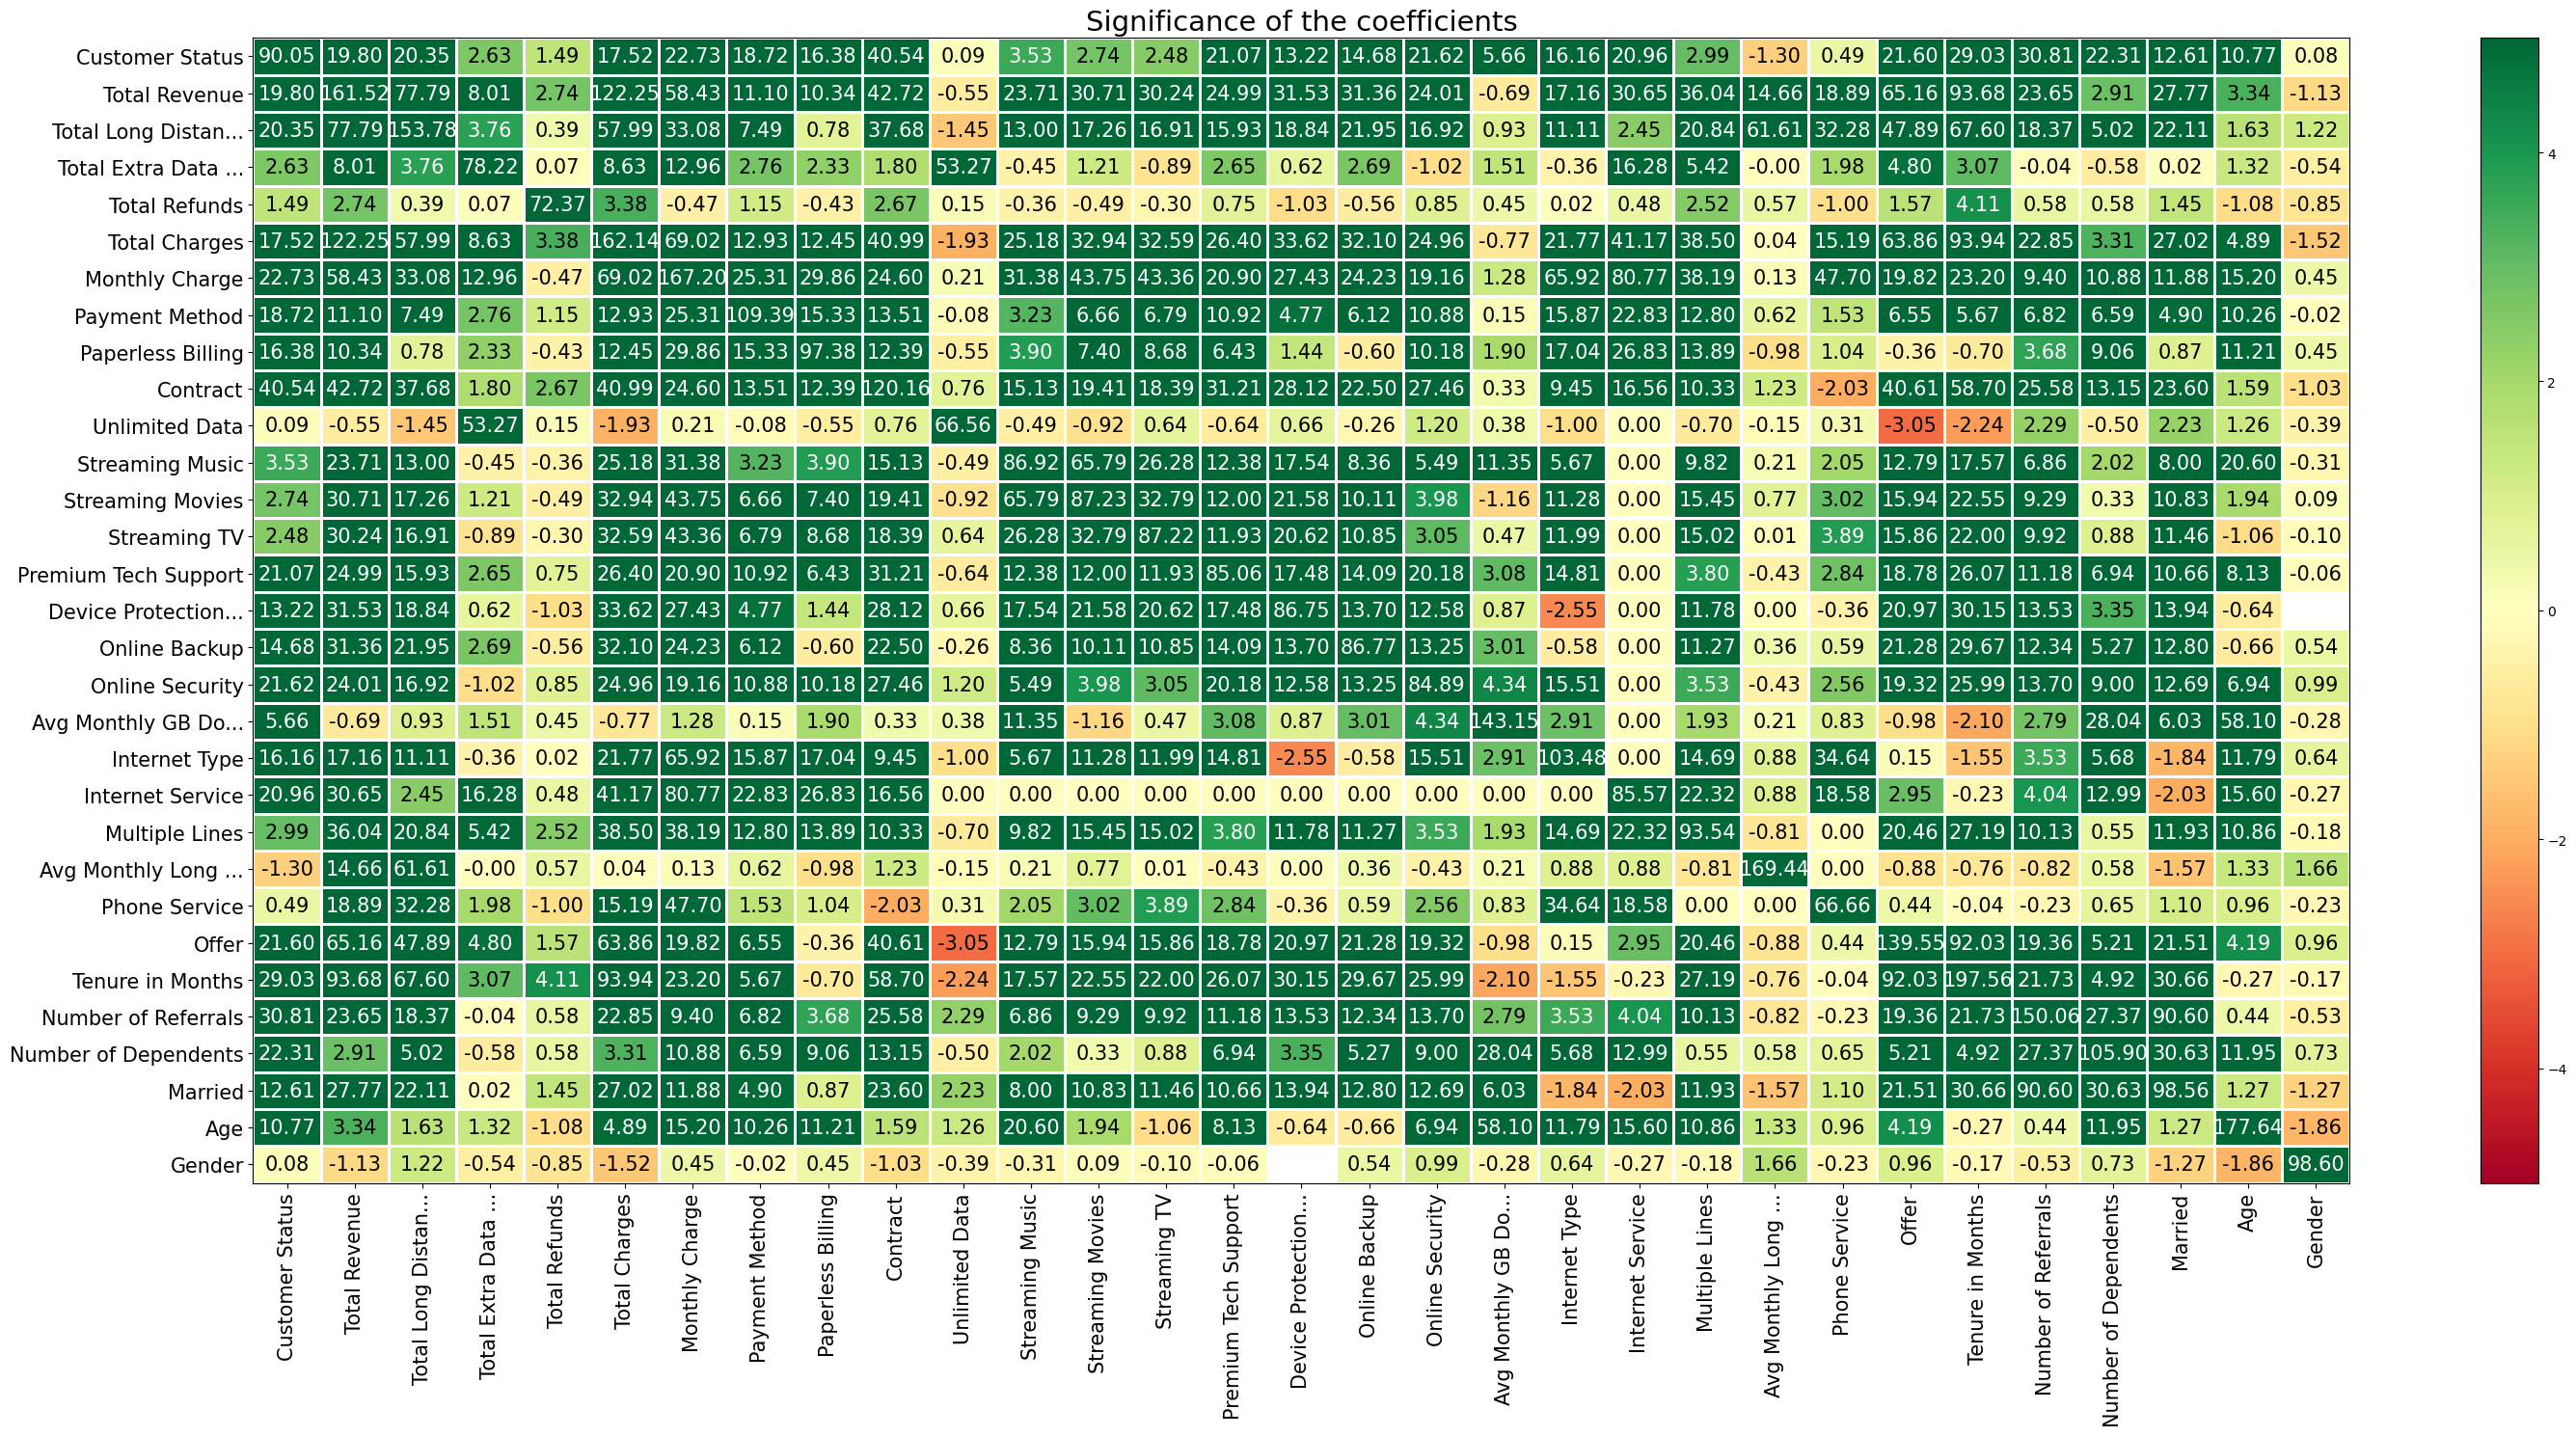

In [24]:
significance_overview = df1.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(30, 15))
plt.tight_layout()

In [25]:
df1['Customer Status'] = df1['Customer Status'].map({'Stayed': 0, 'Churned': 1})

In [26]:
# membuat dataframe yang hanya berisi feature yang dipilih dan target

new_col = ['Number of Referrals','Tenure in Months','Offer','Internet Service','Contract','Payment Method','Total Charges','Total Revenue','Customer Status']
df_model = df1[new_col]
df_model

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status
0,2,9,None,Yes,One Year,Credit Card,593.30,974.81,0
1,0,9,None,Yes,Month-to-Month,Credit Card,542.40,610.28,0
2,0,4,Offer E,Yes,Month-to-Month,Bank Withdrawal,280.85,415.45,1
3,1,13,Offer D,Yes,Month-to-Month,Bank Withdrawal,1237.85,1599.51,1
4,3,3,None,Yes,Month-to-Month,Credit Card,267.40,289.54,1
...,...,...,...,...,...,...,...,...,...
7038,0,13,Offer D,Yes,One Year,Credit Card,742.90,1349.74,0
7039,1,22,Offer D,Yes,Month-to-Month,Bank Withdrawal,1873.70,2230.10,1
7040,0,2,Offer E,Yes,Month-to-Month,Credit Card,92.75,129.99,0
7041,5,67,Offer A,Yes,Two Year,Credit Card,4627.65,4769.69,0


In [27]:
df_model.to_csv('model.csv')

## Data Splitting

### for Inference

In [28]:
# memisahkan data yang akan digunakan untuk model inference di akhir

df_inf = df_model.sample(10, random_state=34)
df_inf

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status
6657,10,71,None,Yes,One Year,Bank Withdrawal,5012.10,5817.95,0
1735,0,27,Offer C,Yes,Month-to-Month,Bank Withdrawal,2093.40,3134.35,0
1115,0,29,None,No,Two Year,Credit Card,554.25,990.99,0
1399,0,23,None,Yes,Two Year,Credit Card,1835.30,2020.45,0
4450,9,60,Offer B,Yes,One Year,Bank Withdrawal,5610.25,8454.25,1
3612,0,54,Offer B,Yes,Two Year,Credit Card,2424.05,2514.05,0
2743,1,12,None,Yes,Month-to-Month,Bank Withdrawal,1218.55,1800.55,1
3448,0,8,None,Yes,Month-to-Month,Bank Withdrawal,713.60,1025.68,0
2455,8,1,None,Yes,Month-to-Month,Credit Card,55.30,91.99,0
1255,1,1,None,Yes,Month-to-Month,Bank Withdrawal,70.00,108.80,1


In [29]:
# membuang semua baris dengan indeks yang sama dengan data inference yang disampling sebelumnya

df_model_raw = df_model.drop(df_inf.index)
df_model_raw

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status
0,2,9,None,Yes,One Year,Credit Card,593.30,974.81,0
1,0,9,None,Yes,Month-to-Month,Credit Card,542.40,610.28,0
2,0,4,Offer E,Yes,Month-to-Month,Bank Withdrawal,280.85,415.45,1
3,1,13,Offer D,Yes,Month-to-Month,Bank Withdrawal,1237.85,1599.51,1
4,3,3,None,Yes,Month-to-Month,Credit Card,267.40,289.54,1
...,...,...,...,...,...,...,...,...,...
7038,0,13,Offer D,Yes,One Year,Credit Card,742.90,1349.74,0
7039,1,22,Offer D,Yes,Month-to-Month,Bank Withdrawal,1873.70,2230.10,1
7040,0,2,Offer E,Yes,Month-to-Month,Credit Card,92.75,129.99,0
7041,5,67,Offer A,Yes,Two Year,Credit Card,4627.65,4769.69,0


In [30]:
# merapikan index data inference

df_inf.reset_index(drop=True, inplace=True)
df_inf

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status
0,10,71,None,Yes,One Year,Bank Withdrawal,5012.10,5817.95,0
1,0,27,Offer C,Yes,Month-to-Month,Bank Withdrawal,2093.40,3134.35,0
2,0,29,None,No,Two Year,Credit Card,554.25,990.99,0
3,0,23,None,Yes,Two Year,Credit Card,1835.30,2020.45,0
4,9,60,Offer B,Yes,One Year,Bank Withdrawal,5610.25,8454.25,1
5,0,54,Offer B,Yes,Two Year,Credit Card,2424.05,2514.05,0
6,1,12,None,Yes,Month-to-Month,Bank Withdrawal,1218.55,1800.55,1
7,0,8,None,Yes,Month-to-Month,Bank Withdrawal,713.60,1025.68,0
8,8,1,None,Yes,Month-to-Month,Credit Card,55.30,91.99,0
9,1,1,None,Yes,Month-to-Month,Bank Withdrawal,70.00,108.80,1


In [31]:
df_inf.to_csv('data_inf.csv')

### Split Train & Test

In [32]:
# memisahkan antara data feature dan target

X= df_model_raw.drop('Customer Status',axis=1)
y= df_model_raw['Customer Status']

# memisahkan antara data train dan data test

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3, stratify=y)
X_train

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue
6834,0,5,None,Yes,Two Year,Credit Card,214.75,214.75
894,3,55,Offer B,Yes,Two Year,Credit Card,3842.60,5375.45
5651,0,8,Offer E,Yes,Month-to-Month,Bank Withdrawal,553.40,888.84
5947,1,42,None,Yes,Month-to-Month,Credit Card,3384.00,4812.84
5604,0,28,Offer C,Yes,Month-to-Month,Bank Withdrawal,3046.05,3182.97
...,...,...,...,...,...,...,...,...
1883,0,32,None,Yes,One Year,Bank Withdrawal,3608.00,3755.52
4967,0,65,None,Yes,Two Year,Bank Withdrawal,6937.95,9660.15
5054,5,35,Offer C,No,Month-to-Month,Bank Withdrawal,882.55,1749.15
700,8,68,None,Yes,One Year,Bank Withdrawal,5333.35,5841.31


### Handling Outliers

In [33]:
# menentukan kolom numerik dari dataset model

num_cols = ['Total Charges','Total Revenue','Tenure in Months']

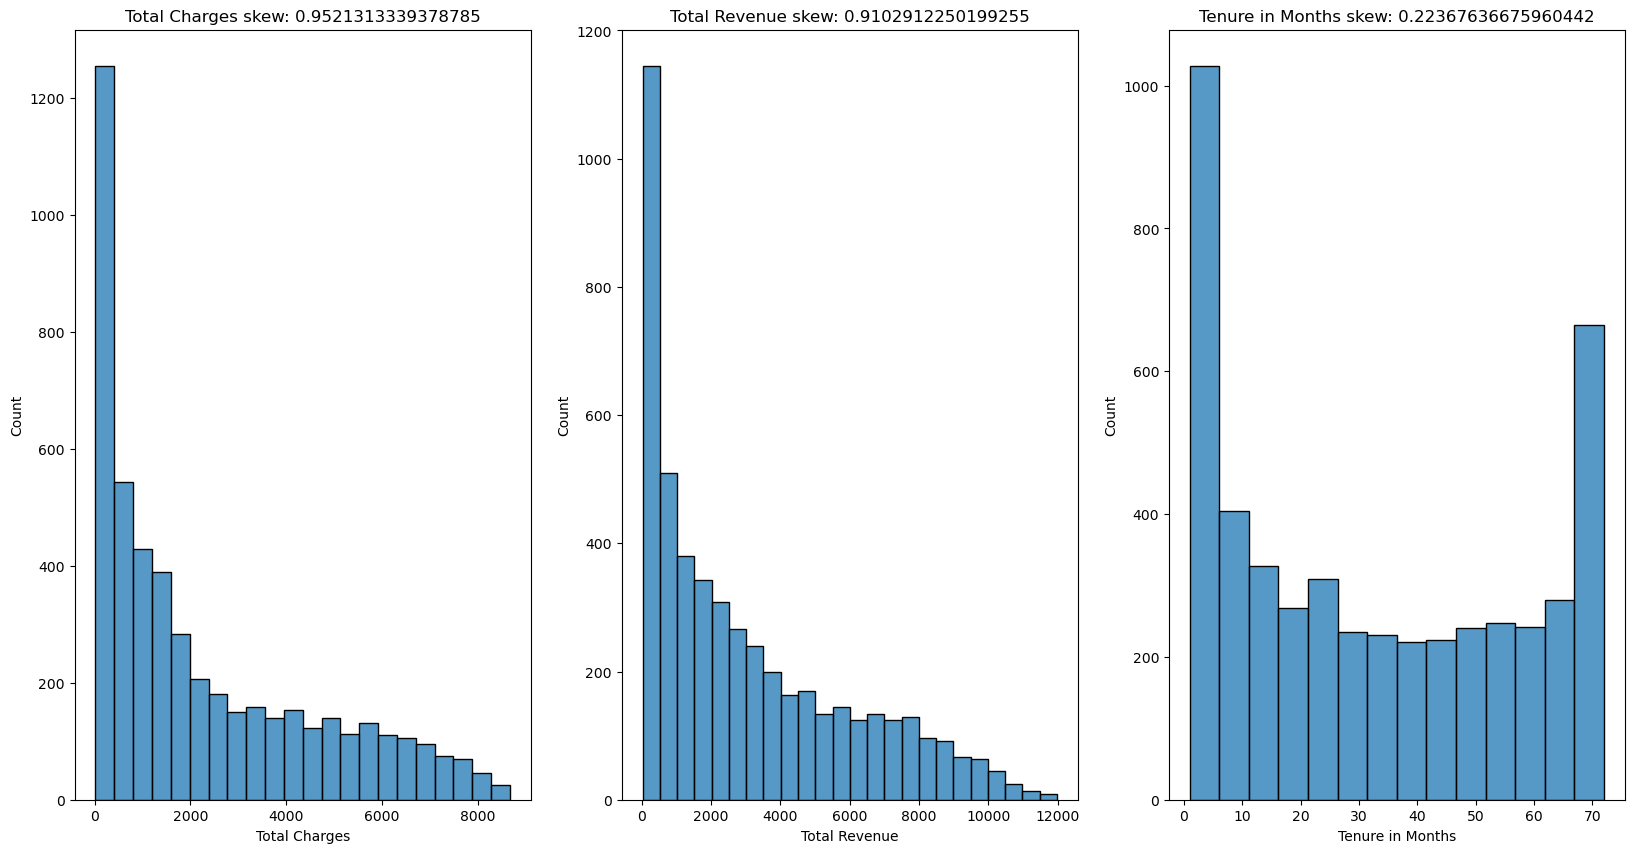

In [34]:
# menampilkan distribusi data kolom bill

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=[20,10])
ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(X_train[col], ax=ax[idx])
    ax[idx].set_title(f'{num_cols[idx]} skew: {X_train[col].skew()}')

In [35]:
# melakukan looping untuk menampilkan jumlah outliers pada kolom limit balance dan age

for i in X_train[num_cols]:
    Q1 = X_train[i].quantile(.25)
    Q3 = X_train[i].quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    outlier = X_train[(X_train[i] <= lower) | (X_train[i] >= upper)]

    print('percentage : ', len(outlier)/X_train[i].shape[0] * 100, '%')

percentage :  0.0 %
percentage :  0.2437538086532602 %
percentage :  0.0 %


In [36]:
# handling outlier dengan capping fold=1.5 karena moderate skewed

wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                  variables=['Total Charges','Total Revenue','Tenure in Months'], missing_values='ignore')


X_train = wins.fit_transform(X_train)

In [37]:
# melakukan scaling pada kolom numerik

X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]
scaler = MinMaxScaler()

X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num))
X_train_num_scaled.columns = scaler.get_feature_names_out()

X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num))
X_test_num_scaled.columns = scaler.get_feature_names_out()

X_train_num_scaled

,Total Charges,Total Revenue,Tenure in Months
0,0.022644,0.017113,0.056338
1,0.441871,0.473773,0.760563
2,0.061777,0.076762,0.098592
3,0.388876,0.423989,0.577465
4,0.349823,0.279765,0.380282
...,...,...,...
4918,0.414761,0.330428,0.436620
4919,0.799564,0.852917,0.901408
4920,0.099813,0.152889,0.478873
4921,0.614140,0.514996,0.943662


`Digunakan min max scaler karena distribusi skewed`

### Features Encoding

In [38]:
# menentukan kolom kategorik dari dataset model

cat_columns = ['Number of Referrals','Internet Service','Contract','Offer','Payment Method']
X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

In [39]:
# melakukan feature encoding menggunakan ordinal encoder karena data kategorikal memiliki urutan

col_ord = ['Number of Referrals','Internet Service','Contract']
ord_enc = OrdinalEncoder()

X_train_cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_cat[col_ord]))
X_train_cat_ord.columns = col_ord

X_test_cat_ord = pd.DataFrame(ord_enc.transform(X_test_cat[col_ord]))
X_test_cat_ord.columns = col_ord

X_train_cat_ord

,Number of Referrals,Internet Service,Contract
0,0.0,1.0,2.0
1,3.0,1.0,2.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4918,0.0,1.0,1.0
4919,0.0,1.0,2.0
4920,5.0,0.0,0.0
4921,8.0,1.0,1.0


In [40]:
# Feature Encoding menggunakan OneHotEncoder karena data kategori tidak memiliki urutan

col_ohe = ['Offer','Payment Method']
ohe_enc = OneHotEncoder(sparse_output=False)

X_train_cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_cat[col_ohe]))
X_train_cat_ohe.columns = ohe_enc.get_feature_names_out()

X_test_cat_ohe = pd.DataFrame(ohe_enc.transform(X_test_cat[col_ohe]))
X_test_cat_ohe.columns = ohe_enc.get_feature_names_out()

X_train_cat_ohe

,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4918,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4919,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4920,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4921,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# menggabungkan hasil scaling data numerik dengan hasil encoding data kategorik ke dalam satu dataframe untuk data train

X_train_final = pd.concat([X_train_num_scaled,X_train_cat_ord, X_train_cat_ohe], axis=1)
X_train_final

,Total Charges,Total Revenue,Tenure in Months,Number of Referrals,Internet Service,Contract,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.022644,0.017113,0.056338,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.441871,0.473773,0.760563,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.061777,0.076762,0.098592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.388876,0.423989,0.577465,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.349823,0.279765,0.380282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,0.414761,0.330428,0.436620,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4919,0.799564,0.852917,0.901408,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4920,0.099813,0.152889,0.478873,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4921,0.614140,0.514996,0.943662,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# menggabungkan hasil scaling data numerik dengan hasil encoding data kategorik ke dalam satu dataframe untuk data test

X_test_final = pd.concat([X_test_num_scaled,X_test_cat_ord, X_test_cat_ohe], axis=1)
X_test_final

,Total Charges,Total Revenue,Tenure in Months,Number of Referrals,Internet Service,Contract,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.260948,0.289738,0.436620,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.523554,0.468685,0.690141,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.020737,0.018166,0.126761,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.495149,0.425759,0.577465,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.072871,0.055574,0.169014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.676587,0.726783,0.774648,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2106,0.027977,0.060113,0.154930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2107,0.920461,0.967980,0.985915,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.028023,0.028778,0.169014,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# membuat pipeline untuk mengolah data numerik dari data mentah

num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5,variables=['Total Charges','Total Revenue','Tenure in Months'], missing_values='ignore')),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[num_cols])

In [44]:
cat_ord_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(unknown_value=20,handle_unknown='use_encoded_value'))
    ])

cat_ord_tr = cat_ord_pipeline.fit_transform(X_train[col_ord])
cat_ord_tr

array([[ 0.,  1.,  2.],
       [ 3.,  1.,  2.],
       [ 0.,  1.,  0.],
       ...,
       [ 5.,  0.,  0.],
       [ 8.,  1.,  1.],
       [10.,  1.,  2.]])

In [45]:
cat_ohe_pipeline = Pipeline([
                ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_ohe_tr = cat_ohe_pipeline.fit_transform(X_train[col_ohe])
cat_ohe_tr

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [46]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat_ord", cat_ord_pipeline, col_ord),
        ("cat_ohe", cat_ohe_pipeline, col_ohe),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr.shape

(4923, 15)

In [47]:
# Feature Scaling

X_train_imbalanced_num = X_train[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train[cat_columns].reset_index().drop(['index'], axis = 1)

# Numeric Scaling

X_train_imbalanced_num = num_pipeline.fit_transform(X_train_imbalanced_num)


In [48]:
X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced_num, columns=num_cols)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_imbalanced_cat], axis=1)
X_train_imbalanced_new

,Total Charges,Total Revenue,Tenure in Months,Number of Referrals,Internet Service,Contract,Offer,Payment Method
0,0.022644,0.017113,0.056338,0,Yes,Two Year,None,Credit Card
1,0.441871,0.473773,0.760563,3,Yes,Two Year,Offer B,Credit Card
2,0.061777,0.076762,0.098592,0,Yes,Month-to-Month,Offer E,Bank Withdrawal
3,0.388876,0.423989,0.577465,1,Yes,Month-to-Month,None,Credit Card
4,0.349823,0.279765,0.380282,0,Yes,Month-to-Month,Offer C,Bank Withdrawal
...,...,...,...,...,...,...,...,...
4918,0.414761,0.330428,0.436620,0,Yes,One Year,None,Bank Withdrawal
4919,0.799564,0.852917,0.901408,0,Yes,Two Year,None,Bank Withdrawal
4920,0.099813,0.152889,0.478873,5,No,Month-to-Month,Offer C,Bank Withdrawal
4921,0.614140,0.514996,0.943662,8,Yes,One Year,None,Bank Withdrawal


In [49]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([3,4,5,6,7], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train)
y_train_balanced.value_counts()

0    3617
1    3617
Name: Customer Status, dtype: int64

In [50]:
# mengubah data test dengan pipeline yang sudah dibuat

test_tr = full_pipeline.transform(X_test)

## Modeling

```
- Kelas positif dari model yang akan dibuat adalah kelas Churned (1)

- Model digunakan untuk memprediksi customer Churned

- Sehingga yang ingin kita minimalisir adalah customer yang aktualnya Churned tapi diprediksi Stayed atau False Negative

- Maka metrics evaluasi yang akan digunakan adalah recall
```

### Logistic Regression

In [51]:
from imblearn.pipeline import Pipeline as imbpipe
logpipe = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5,6,7], random_state=0)),
            ('logreg', LogisticRegression(random_state=0))
])

In [52]:
logpipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Total '
                                                                                         'Charges',
                                                                                         'Total '
                                                                                         'Revenue',
                                                                                         'Tenure '
                                                                                         'in '
                                                                                         'Months'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Total Charges',
                                                   'Total Revenue',
                                                   'Tenure in Months']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('o...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=20))]),
                                                  ['Number of Referrals',
                                                   'Internet Service',
                                                   'Contract']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['Offer',
                                                   'Payment Method'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7], random_state=0)),
                ('logreg', LogisticRegression(random_state=0))])

In [53]:
sk = StratifiedKFold(n_splits=10)
scores_log =cross_val_score(logpipe,X_train,y_train,cv=sk,scoring="recall")

print('Recall - All - Cross Validation  : ', scores_log)
print('Recall - Mean - Cross Validation : ', scores_log.mean())
print('Recall - Std - Cross Validation  : ', scores_log.std())
print('Recall - Range of Test-Set       : ', (scores_log.mean()-scores_log.std()) , '-', (scores_log.mean()+scores_log.std()))

Recall - All - Cross Validation  :  [0.81679389 0.88549618 0.80152672 0.87692308 0.83076923 0.79230769
 0.81538462 0.83206107 0.85496183 0.82442748]
Recall - Mean - Cross Validation :  0.8330651790957134
Recall - Std - Cross Validation  :  0.02909653349937844
Recall - Range of Test-Set       :  0.803968645596335 - 0.8621617125950919


### Support Vector Classifier

In [54]:
svcpipe = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5,6,7], sampling_strategy=0.5, random_state=0)),
            ('logreg', SVC(random_state=0))
])

In [55]:
svcpipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Total '
                                                                                         'Charges',
                                                                                         'Total '
                                                                                         'Revenue',
                                                                                         'Tenure '
                                                                                         'in '
                                                                                         'Months'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Total Charges',
                                                   'Total Revenue',
                                                   'Tenure in Months']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('o...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=20))]),
                                                  ['Number of Referrals',
                                                   'Internet Service',
                                                   'Contract']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['Offer',
                                                   'Payment Method'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7], random_state=0,
                         sampling_strategy=0.5)),
                ('logreg', SVC(random_state=0))])

In [56]:
sk = StratifiedKFold(n_splits=10)
scores_svc =cross_val_score(svcpipe,X_train,y_train,cv=sk,scoring="recall")

print('Recall - All - Cross Validation  : ', scores_svc)
print('Recall - Mean - Cross Validation : ', scores_svc.mean())
print('Recall - Std - Cross Validation  : ', scores_svc.std())
print('Recall - Range of Test-Set       : ', (scores_svc.mean()-scores_svc.std()) , '-', (scores_svc.mean()+scores_svc.std()))

Recall - All - Cross Validation  :  [0.75572519 0.67175573 0.73282443 0.73076923 0.76923077 0.73846154
 0.71538462 0.78625954 0.75572519 0.73282443]
Recall - Mean - Cross Validation :  0.7388960657662949
Recall - Std - Cross Validation  :  0.029883958055899707
Recall - Range of Test-Set       :  0.7090121077103951 - 0.7687800238221946


### Random Forest Classifier

In [57]:
rfcpipe = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5,6,7], sampling_strategy=0.5, random_state=0)),
            ('logreg', RandomForestClassifier(random_state=0))
])

In [58]:
rfcpipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Total '
                                                                                         'Charges',
                                                                                         'Total '
                                                                                         'Revenue',
                                                                                         'Tenure '
                                                                                         'in '
                                                                                         'Months'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Total Charges',
                                                   'Total Revenue',
                                                   'Tenure in Months']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('o...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=20))]),
                                                  ['Number of Referrals',
                                                   'Internet Service',
                                                   'Contract']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['Offer',
                                                   'Payment Method'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7], random_state=0,
                         sampling_strategy=0.5)),
                ('logreg', RandomForestClassifier(random_state=0))])

In [59]:
sk = StratifiedKFold(n_splits=10)
scores_rfc =cross_val_score(rfcpipe,X_train,y_train,cv=sk,scoring="recall")

print('Recall - All - Cross Validation  : ', scores_rfc)
print('Recall - Mean - Cross Validation : ', scores_rfc.mean())
print('Recall - Std - Cross Validation  : ', scores_rfc.std())
print('Recall - Range of Test-Set       : ', (scores_rfc.mean()-scores_rfc.std()) , '-', (scores_rfc.mean()+scores_rfc.std()))

Recall - All - Cross Validation  :  [0.63358779 0.60305344 0.61832061 0.6        0.6        0.68461538
 0.61538462 0.60305344 0.61068702 0.54961832]
Recall - Mean - Cross Validation :  0.6118320610687024
Recall - Std - Cross Validation  :  0.03182990760768098
Recall - Range of Test-Set       :  0.5800021534610214 - 0.6436619686763834


### K Nearest Neighbor

In [60]:
knnpipe = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5,6,7], sampling_strategy=0.5, random_state=0)),
            ('logreg', KNeighborsClassifier())
])

In [61]:
knnpipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Total '
                                                                                         'Charges',
                                                                                         'Total '
                                                                                         'Revenue',
                                                                                         'Tenure '
                                                                                         'in '
                                                                                         'Months'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Total Charges',
                                                   'Total Revenue',
                                                   'Tenure in Months']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('o...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=20))]),
                                                  ['Number of Referrals',
                                                   'Internet Service',
                                                   'Contract']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['Offer',
                                                   'Payment Method'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7], random_state=0,
                         sampling_strategy=0.5)),
                ('logreg', KNeighborsClassifier())])

In [62]:
sk = StratifiedKFold(n_splits=10)
scores_knn =cross_val_score(knnpipe,X_train,y_train,cv=sk,scoring="recall")

print('Recall - All - Cross Validation  : ', scores_knn)
print('Recall - Mean - Cross Validation : ', scores_knn.mean())
print('Recall - Std - Cross Validation  : ', scores_knn.std())
print('Recall - Range of Test-Set       : ', (scores_knn.mean()-scores_knn.std()) , '-', (scores_knn.mean()+scores_knn.std()))

Recall - All - Cross Validation  :  [0.70992366 0.67938931 0.67938931 0.66923077 0.63846154 0.66923077
 0.61538462 0.69465649 0.70992366 0.6259542 ]
Recall - Mean - Cross Validation :  0.6691544333529066
Recall - Std - Cross Validation  :  0.03143825657582189
Recall - Range of Test-Set       :  0.6377161767770847 - 0.7005926899287285


## Hyperparameter Tuning

```
Berdasarkan hasil cross validasi maka akan digunakan Logistic Regression sebagai model yang akan diberlakukan hyperparameter tuning dan disimpan

In [63]:
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(logpipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     missing_values='ignore',
                                                                                                     tail='both',
                                                                                                     variables=['Total '
                                                                                                                'Charges',
                                                                                                                'Total '
                                                                                                                'Revenue',
                                                                                                                'Tenure '
                                                                                                                'in '
                                                                                                                'Months'])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Total '
                                                                          'Charges',
                                                                          'Total '
                                                                          'Revenue',
                                                                          'Tenure '
                                                                          'in '
                                                                          'Mont...
                                                                         Pipeline(steps=[('ohe_enc',
                                                                                          OneHotEncoder(sparse=False,
                                                                                                        sparse_output=False))]),
                                                                         ['Offer',
                                                                          'Payment '
                                                                          'Method'])])),
                                       ('over_sampl',
                                        SMOTENC(categorical_features=[3, 4, 5,
                                                                      6, 7],
                                                random_state=0)),
                                       ('logreg',
                                        LogisticRegression(random_state=0))]),
             param_grid={'logreg__C': [0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [64]:
# menampilkan parameter yang menghasilkan performa terbaik pada model

grid_search.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [65]:
# menampilkan hasil score dari model dengan parameter terbaik hasil hyperparameter tuning

grid_search.best_score_

0.7763513680822086

In [66]:
# melakukan prediksi dengan model hasil hyperparameter tuning

model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      3617
           1       0.55      0.83      0.66      1306

    accuracy                           0.78      4923
   macro avg       0.74      0.79      0.75      4923
weighted avg       0.83      0.78      0.79      4923

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1550
           1       0.55      0.85      0.67       560

    accuracy                           0.78      2110
   macro avg       0.74      0.80      0.75      2110
weighted avg       0.83      0.78      0.79      2110



`Hasil hyperparameter tuning menghasilkan model yang good fit dimana nilai recalnya hampir sama`

## Model Saving

In [67]:
# persiapan save model
logpipe_final = imbpipe([
            ('preprocess', full_pipeline),
            ('logreg', LogisticRegression(C=1, penalty='l2', solver='liblinear'))
])

logpipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Total '
                                                                                         'Charges',
                                                                                         'Total '
                                                                                         'Revenue',
                                                                                         'Tenure '
                                                                                         'in '
                                                                                         'Months'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Total Charges',
                                                   'Total Revenue',
                                                   'Tenure in Months']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=20))]),
                                                  ['Number of Referrals',
                                                   'Internet Service',
                                                   'Contract']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['Offer',
                                                   'Payment Method'])])),
                ('logreg', LogisticRegression(C=1, solver='liblinear'))])

In [68]:
# menyimpan model hasil parameter tuning

with open('churn_pred.pkl', 'wb') as file_1:
  joblib.dump(logpipe_final, file_1)

## Model Inference

In [69]:
df_inf

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status
0,10,71,None,Yes,One Year,Bank Withdrawal,5012.10,5817.95,0
1,0,27,Offer C,Yes,Month-to-Month,Bank Withdrawal,2093.40,3134.35,0
2,0,29,None,No,Two Year,Credit Card,554.25,990.99,0
3,0,23,None,Yes,Two Year,Credit Card,1835.30,2020.45,0
4,9,60,Offer B,Yes,One Year,Bank Withdrawal,5610.25,8454.25,1
5,0,54,Offer B,Yes,Two Year,Credit Card,2424.05,2514.05,0
6,1,12,None,Yes,Month-to-Month,Bank Withdrawal,1218.55,1800.55,1
7,0,8,None,Yes,Month-to-Month,Bank Withdrawal,713.60,1025.68,0
8,8,1,None,Yes,Month-to-Month,Credit Card,55.30,91.99,0
9,1,1,None,Yes,Month-to-Month,Bank Withdrawal,70.00,108.80,1


In [70]:
with open('churn_pred.pkl', 'rb') as file_1:
  model_log_reg = joblib.load(file_1)

In [71]:
y_pred_inf = model_log_reg.predict(df_inf)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [72]:
df_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'])

In [73]:
df_compare = pd.concat([df_inf,df_pred_inf], axis=1)
df_compare

,Number of Referrals,Tenure in Months,Offer,Internet Service,Contract,Payment Method,Total Charges,Total Revenue,Customer Status,Prediction
0,10,71,None,Yes,One Year,Bank Withdrawal,5012.10,5817.95,0,0
1,0,27,Offer C,Yes,Month-to-Month,Bank Withdrawal,2093.40,3134.35,0,1
2,0,29,None,No,Two Year,Credit Card,554.25,990.99,0,0
3,0,23,None,Yes,Two Year,Credit Card,1835.30,2020.45,0,0
4,9,60,Offer B,Yes,One Year,Bank Withdrawal,5610.25,8454.25,1,0
5,0,54,Offer B,Yes,Two Year,Credit Card,2424.05,2514.05,0,0
6,1,12,None,Yes,Month-to-Month,Bank Withdrawal,1218.55,1800.55,1,1
7,0,8,None,Yes,Month-to-Month,Bank Withdrawal,713.60,1025.68,0,1
8,8,1,None,Yes,Month-to-Month,Credit Card,55.30,91.99,0,0
9,1,1,None,Yes,Month-to-Month,Bank Withdrawal,70.00,108.80,1,1


## Conclusions

```
Layanan telekomunikasi sudah menjadi kebutuhan yang cukup vital dalam kehidupan saat ini. Kondisi ini membuat tumbuhnya banyak perusahaan penyedia layanan telekomunikasi. Pertumbuhan jumlah perusahaan yang pesat menimbulkan persaingan yang ketat antar satu perusahaan dengan perusahaan yang lain. Sehingga setiap perusahaan berusaha untuk menawarkan paket-paket layanan yang menarik customer untuk berlangganan. Penawaran tersebut diharapkan dapat meningkatkan jumlah pelanggan baru sekaligus menjaga loyalitas pelanggan lama.

Di tengah ketatnya persaingan antar perusahaan telekomunikasi, ada kondisi yang yang dihindari oleh semua perusahaan yaitu churned. Churned adalah kondisi dimana customer berhenti menggunakan layanan suatu perusahaan. Jika jumlah churned meningkat tentu ini akan sangat mempengaruhi pendapatan perusahaan. Perusahaan perlu mencegah seorang customer sebelum dia menjadi berstatus churned. Untuk itu dibuat permodelan yang bertujuan mendeteksi apakah seorang customer akan menjadi churned atau tidak. Di mana jika seseorang dideteksi akan berstatus churned maka perusahaan perlu melakukan pendekatan intensif pada customer tersebut agar tidak benar-benar menjadi churn.

Data yang digunakan untuk permodelan adalah data dalam rentang waktu April - Juni 2022. Model dibuat dengan menggunakan 4 algoritma yang berbeda. Pada semua algoritma dilakukan tuning dengan beberapa parameter yang berpengaruh sampai didapat hasil yang optimal. Hasil dari keempat model tersebut dibandingkan dan dipilih model dengan performa terbaik dalam mendeteksi churned. Hasil permodelan menunjukkan performa terbaik dihasilkan dari algoritma Logistic Regression. Model berhasil memprediksi churn dengan performa 85%. Model yang dibuat dapat ditingkatkan performanya dengan menambahkan parameter saat melakukan tuning

Selain membuat model untuk mendeteksi apakah customer akan menjadi churn atau tidak, kita juga perlu menganalisa kondisi churned pada data historis untuk mengetahui alasan customer berhenti berlangganan dan mencari solusi dari masalah tersebut.

Dari data perusahaan, kita mendapati bahwa terjadi churn yang sangat tinggi di kota San Diego. Dimana dari 285 customer, 185 berstatus churned di akhir Juni 2022. Ini perlu menjadi prioritas jangka pendek buat perusahaan karena hal ini hanya terjadi di San Diego. Mayoritas customer tersebut berhenti berlangganan karena mendapatkan tawaran paket layanan dari kompetitor yang dirasa lebih baik. Jika kita mengecek lebih lanjut, tenyata mayoritas customer tersebut memang tidak menerima semua tawaran yang diajukan oleh marketing perusahaan. Ini bisa menjadi masukan untuk tim marketing supaya meramu ulang paket - paket tawaran yang ada agar lebih menarik karena saat ini paket-paket tersebut masih belum maksimal untuk mencegah seorang customer berpindah ke operator lain.

Secara umum, kondisi churned pada perusahaan kita disebabkan oleh 3 faktor yaitu kompetitor, ketidakpuasan, dan sikap pelayanan yang buruk. Jika diperinci lagi maka didapatkan alasan terbesar customer kita churn adalah customer merasa kompetitor memiliki peralatan yang lebih baik. Tenyata mayoritas customer yang merasa pihak kompetitor memiliki peralatan yang lebih baik adalah customer yang dilayani dengan jaringan fiber optic. Ada 2 kemungkinan dari hal ini, apakah fiber optic yang kita gunakan kualitasnya di bawah kualitas fiber optic yang digunakan kompetitor atau sering terjadi gangguan pada jaringan fiber optic yang kita miliki. Jika terkait kualitas fiber optic maka perlu dipertimbangkan untuk mengganti fiber optic yang digunakan secara bertahap. Jika terkait gangguan jaringan, ini bisa menjadi catatan untuk meningkatkan kinerja tim maintenance.
```